In [75]:
import csv
import glob
import os
import pandas as pd
from pandas import DataFrame
import numpy as np  
from IPython.display import Image, display
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
import datetime



## read all csv files, covid daily reports frm April 12th to Augest 20th

os.chdir("C:\\Users\\Robin\\Documents\\Gatech\\COVID-19-master\\COVID-19-master\\csse_covid_19_data\\csse_covid_19_daily_reports_us")

extension = "csv"

all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames])

combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

combined_csv


,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,Unnamed: 0
0,Alabama,US,2020-04-12 23:18:15,32.3182,-86.9023,3563,93,NaN,3470.0,1.0,75.988020,21583.0,437.0,2.610160,84000001.0,USA,460.300152,12.264945,NaN
1,Alaska,US,2020-04-12 23:18:15,61.3707,-152.4044,272,8,66.0,264.0,2.0,45.504049,8038.0,31.0,2.941176,84000002.0,USA,1344.711576,11.397059,NaN
2,Arizona,US,2020-04-12 23:18:15,33.7298,-111.4312,3542,115,NaN,3427.0,4.0,48.662422,42109.0,NaN,3.246753,84000004.0,USA,578.522286,NaN,NaN
3,Arkansas,US,2020-04-12 23:18:15,34.9697,-92.3731,1280,27,367.0,1253.0,5.0,49.439423,19722.0,130.0,2.109375,84000005.0,USA,761.753354,10.156250,NaN
4,California,US,2020-04-12 23:18:15,36.1162,-119.6816,22795,640,NaN,22155.0,6.0,58.137726,190328.0,5234.0,2.812020,84000006.0,USA,485.423868,22.961176,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,New York,US,2020-08-20 04:30:22,42.1657,-74.9481,427202,32865,74328.0,320009.0,36.0,2196.009255,7272403.0,89995.0,7.693082,84000036.0,USA,37383.402453,21.066147,91312.0
5105,Texas,US,2020-08-20 04:30:22,31.0545,-97.5635,574633,10934,424685.0,139014.0,48.0,1981.774584,4517189.0,NaN,1.902780,84000048.0,USA,15578.726509,NaN,91325.0
5106,Massachusetts,US,2020-08-21 04:30:30,42.2302,-71.5301,124728,8888,102205.0,13635.0,25.0,1809.618364,1518522.0,12225.0,7.125906,84000025.0,USA,22031.502924,9.801328,91359.0
5107,New York,US,2020-08-21 04:30:30,42.1657,-74.9481,427803,32861,74406.0,320536.0,36.0,2199.098664,7353387.0,89995.0,7.681339,84000036.0,USA,37799.696415,21.036552,91370.0


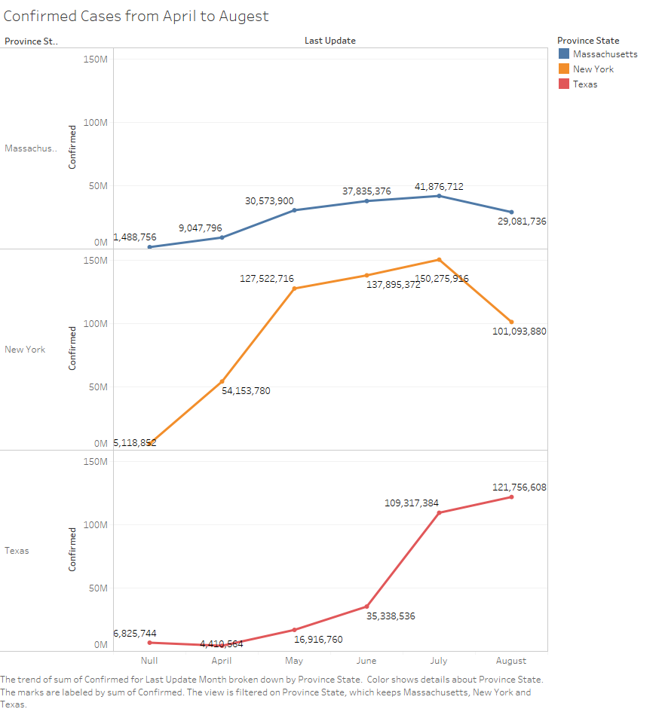

In [19]:
display(Image(filename='C:\\Users\\Robin\\Documents\\corona-analysis\\Comfirmed.png', embed=True))

In [99]:
# filter all the other states data out
States = ["New York", "Texas", "Massachusetts"]
df = combined_csv[combined_csv.Province_State.isin(States)]
df = df.join(pd.DataFrame(df.Last_Update.str.split(" ").tolist(), columns = ['date','time']))
new_df = df.drop(columns = ["Last_Update","time","Country_Region","Unnamed: 0"])
new_df = new_df[new_df["date"].notna()]
pd.to_datetime(new_df["date"])
new_df.dtypes

Province_State           object
Lat                     float64
Long_                   float64
Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                  float64
FIPS                    float64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
UID                     float64
ISO3                     object
Testing_Rate            float64
Hospitalization_Rate    float64
date                     object
dtype: object

In [100]:
NY = new_df[new_df["Province_State"]== "New York"]
TX = new_df[new_df["Province_State"]== "Texas"]
MA = new_df[new_df["Province_State"]== "Massachusetts"]

In [101]:
# look at the statistical details of the NY dataset
NY.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,2.773000e+03,2.773000e+03,2773.000000,2773.000000,2773.000000,2773.000000,2773.0,2773.000000,2.773000e+03,2773.000000,2773.000000,2773.0,2773.000000,2773.000000
mean,4.216570e+01,-7.494810e+01,365618.750811,28835.699964,62276.474576,278370.737829,36.0,1935.319896,3.281574e+06,81250.945907,7.834638,84000036.0,17033.976306,22.209699
std,1.478195e-12,1.691397e-12,56514.594792,5255.500104,15603.475006,30690.272998,0.0,224.702566,2.100766e+06,13173.557224,0.518127,0.0,10614.507570,0.933543
min,4.216570e+01,-7.494810e+01,189033.000000,9385.000000,23887.000000,179648.000000,36.0,1121.124012,4.616010e+05,42594.000000,4.964742,84000036.0,2737.680538,19.556090
25%,4.216570e+01,-7.494810e+01,340661.000000,27477.000000,59193.000000,261351.000000,36.0,1864.769129,1.258907e+06,73963.000000,7.808732,84000036.0,7087.221717,21.584174
50%,4.216570e+01,-7.494810e+01,383944.000000,30856.000000,68851.000000,284237.000000,36.0,1987.070645,2.991210e+06,89995.000000,7.998441,84000036.0,15376.156581,21.885944
75%,4.216570e+01,-7.494810e+01,406305.000000,32478.000000,72064.000000,301763.000000,36.0,2088.589333,5.069266e+06,89995.000000,8.048457,84000036.0,26058.293389,22.836792
max,4.216570e+01,-7.494810e+01,427803.000000,32865.000000,74406.000000,320536.000000,36.0,2199.098664,7.353387e+06,89995.000000,8.141231,84000036.0,37799.696415,24.218809


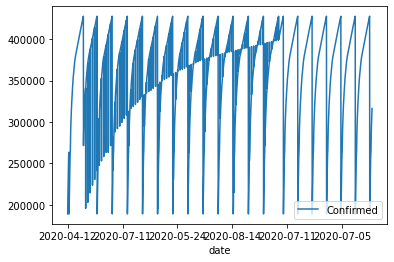

In [115]:
NY.plot(x = "date", y = "Confirmed")
